## Implementation of Naive Bayes and Logistic Regression...

## Import Relevant Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#settings all the styles of seaborn
sns.set_style()

## Load the Data

In [3]:
data = pd.read_csv('liver_disease_1.csv')

In [4]:
data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes


## Data Preprocessing

In [5]:
#Checking for null values

data.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [6]:
mean_value = np.mean(data['Albumin_and_Globulin_Ratio'])

data['Albumin_and_Globulin_Ratio'].fillna(mean_value, inplace=True)

In [7]:
#Verifying the data again for any null values

data.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [8]:
#Renaming and Replacing the categorical type of 'yes' and 'no' to integer type

data.rename(columns={"Dataset":"Outcome"},inplace=True)

data.Outcome.replace(('Yes','No'),(1,0),inplace=True)


In [9]:
#Result

data.Outcome

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Outcome, Length: 583, dtype: int64

#### Hence we have done the data cleaning and preprocessing will move to next part

## Data Analysis

In [10]:
#Statistical description of the data

data.drop('Outcome',axis=1).describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


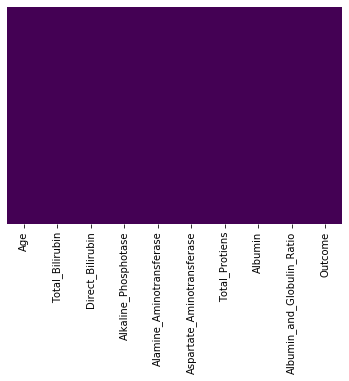

In [11]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

There are no missing values in our data

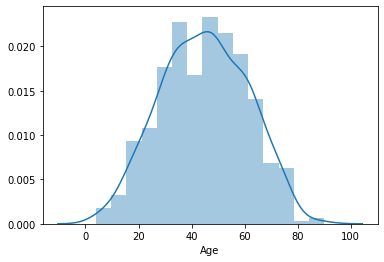

In [12]:
sns.distplot(data['Age'])

The mean age lies somewhere between 40 and 50 maximun age is 90 and minimum age of around 4

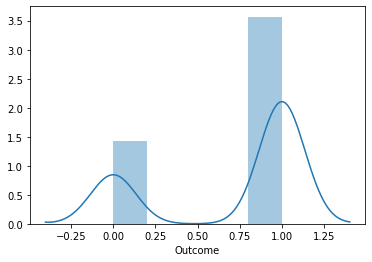

In [13]:
sns.distplot(data['Outcome'])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
Age                           583 non-null int64
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    583 non-null float64
Outcome                       583 non-null int64
dtypes: float64(5), int64(5)
memory usage: 45.7 KB


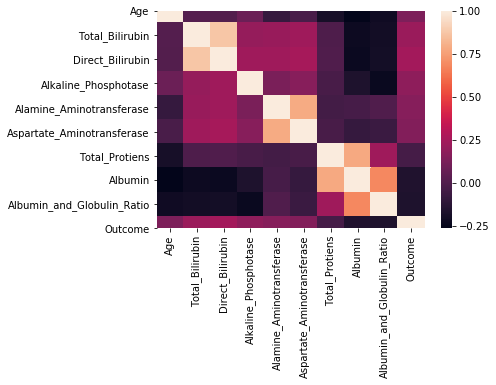

In [15]:
#Correlation of the data

sns.heatmap(data.corr())

### Features and target variables

In [16]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

## Train test split

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(466, 9)
(117, 9)
(466,)
(117,)


## Building the model

#### Standardizing the data

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Implementing Naive Bayes

In [47]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions

In [56]:
prediction = model.predict(X_test)
data.head(1)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,65,0.7,0.1,187,16,18,6.8,3.3,0.9,1


In [69]:
model.predict(X_test[[0][1][2]])

IndexError: list index out of range

## Accuracy

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:" ,accuracy_score(y_test,prediction))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

Accuracy: 0.7435897435897436
[[ 0 30]
 [ 0 87]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.74      1.00      0.85        87

    accuracy                           0.74       117
   macro avg       0.37      0.50      0.43       117
weighted avg       0.55      0.74      0.63       117



C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Implementing Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression(solver="lbfgs")

model_log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
#predictions

pred = model_log.predict(X_test)

In [52]:
print("Accuracy:" ,accuracy_score(y_test,pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


Accuracy: 0.7435897435897436
Confusion Matrix:
[[ 0 30]
 [ 0 87]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.74      1.00      0.85        87

    accuracy                           0.74       117
   macro avg       0.37      0.50      0.43       117
weighted avg       0.55      0.74      0.63       117



C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
